In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import os
import scipy
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (8,8)

import nltk 
#nltk.download("all")
from wordcloud import WordCloud


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

## Let's Have a General Overview of Our Dataset

In [3]:
df = pd.read_pickle("FinTech_cleaned.pkl")

In [4]:
df.columns # name of the columns
df.dtypes  # type of each column

Index(['topic', 'tweet', 'user', 'date', 'description', 'location',
       'followers', 'stakeholder'],
      dtype='object')

topic          object
tweet          object
user           object
date           object
description    object
location       object
followers      object
stakeholder    object
dtype: object

In [5]:
df.shape
df.head(2)
df.describe()
#stakeholder : group the user was automatically classified to ( Ambiguous  means there is no label)

(349153, 8)

,topic,tweet,user,date,description,location,followers,stakeholder
0,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,Thu Jan 12 17:14:10 +0000 2017,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous
1,Fintech,RT @guzmand: No one innovation is a silver bul...,anas_sulaimi,Thu Jan 12 17:14:12 +0000 2017,GUtech Graduate #IT Consultant: #cybersecurity...,"Muscat, Oman",\N,Ambiguous


,topic,tweet,user,date,description,location,followers,stakeholder
count,349153,349153,349153,349153,349153,349153,349153,349153
unique,1,217112,59345,318660,62036,19335,21656,11
top,Fintech,RT @quovo: From 18 to 215 financial institutio...,bitcoinagile,Thu Mar 02 12:42:33 +0000 2017,"Streaming News: Bitcoin, Blockchain & Beyond #...",\N,\N,Ambiguous
freq,349153,1784,10018,34,10018,73058,173264,206094


In [6]:
print("Total no of Users:\n",len(df.user))
print("Number of Unique Users:\n",len(pd.unique(df.user)))
print("Total no of StackHolder:\n", len(df.stakeholder))
print("Number of Unique Stack Holder:\n", len(pd.unique(df.stakeholder)))

Total no of Users:
 349153
Number of Unique Users:
 59345
Total no of StackHolder:
 349153
Number of Unique Stack Holder:
 11


** 59345 Users are classifierd into 11 Different Stakeholder group(including Ambiguous) **
    

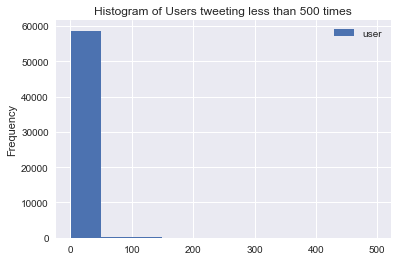

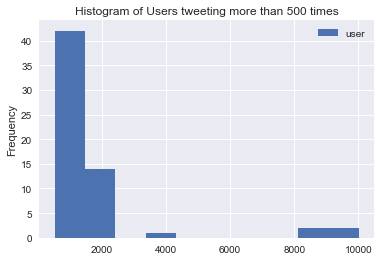

In [7]:
user_count = pd.DataFrame(df.user.value_counts())
user_count.head(2)
user_count[user_count<500].plot(kind = 'hist', title = "Histogram of Users tweeting less than 500 times");
user_count[user_count>500].plot(kind = 'hist', title = "Histogram of Users tweeting more than 500 times");


** There are few users who are tweeting more than 10000 times but the there are around 50 users tweeting around 5000-6000 times **

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df.head(1)

,topic,tweet,user,date,description,location,followers,stakeholder,year,month
0,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,2017-01-12 17:14:10,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous,2017,1


In [9]:
np.unique(df.year)
np.unique(df.month)

array([2017])

array([1, 2, 3])

*** All the tweets are from 2017 and from first three months ***

In [10]:
location = pd.DataFrame(df.location.value_counts())
location.head(15)

,location
\N,73058
London,11991
Matter Doesn't Matter,10018
"London, England",9893
"Ottawa, Ontario",8334
"New York, NY",4222
Global,4163
"Toronto, Ontario",3691
Visit me,3416
United States,3142


** Maximum no of tweets are from World's Finance Centers But we have new contries like Bitcoinland**

## Time to do some Data Cleaning
    - I am going to omit all the rows with location /N or unknown

In [11]:
df.followers.value_counts().head()

\N      173264
704        251
1944       230
699        228
37         219
Name: followers, dtype: int64

In [12]:
from nltk.tokenize import word_tokenize


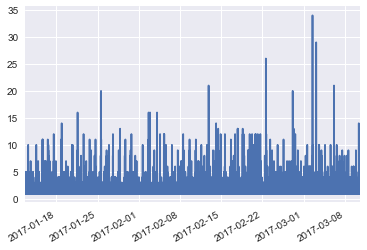

In [13]:
da = df.date.value_counts()
da.head()
da.plot();

** Tweeting activity for FinTech has a somewhat irregular trend but oVerall It's increasing with time. **

In [14]:
# for row in [5, 9, 11]:
#     raw_tweet = df['tweet'].get(row)
#     print(raw_tweet)
#     print(nltk.word_tokenize(raw_tweet.lower()), '\n')

In [15]:
# from sklearn.feature_extraction.text import CountVectorizer
# import nltk

# raw_tweets = df['tweet'].tolist()
# raw_tweets


In [16]:

# #raw_tweets = train_data['tweet'].tolist()

# vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize,
#                              stop_words='english',
#                              max_features=3000,
#                              ngram_range=(1,1))

# # Train the vectorizer on our vocabulary
# vectorizer.fit(raw_tweet)

# # Make a rectangle
# x_test = vectorizer.transform(raw_tweet)

# x_test

## Let's Analyse our Twitter Data with Various StakeHolder Perspective

In [17]:
def t(x):
    return pd.Series(dict(Number_of_tweets = x['tweet'].count(),
                        Number_of_users = len(np.unique(x['user'])),
                       Num_diff_locations = len(np.unique(x['location']))
                      ))

I am trying to make a DataFrame giving these inforamtion for Each Stackholder:
    - Total No of Tweets
    - TOtal No of Users for Each Stackholder
    - No of Unique locations Users are from
    

In [18]:
# Let's Count By stackholder
stakeholder_count = df.groupby('stakeholder').apply(t) 
print(len(stakeholder_count))
stakeholder_count


11


,Num_diff_locations,Number_of_tweets,Number_of_users
stakeholder,,,
Academia,372,1716,501
Ambiguous,12884,206094,38117
Business Representatives,2352,51831,6113
Companies,1460,16582,3072
Corporate Interest Groups,246,2103,433
Expert Institutions,79,327,94
Individual Experts,629,6294,989
Media,754,39125,1662
Non-Corporate Interests,201,1045,275


** Here Ambiguous Group is having a number of Various group, that's why Highest. **

stakeholder_count.sort() - it will sort the dataframe by the stakeholder names, but that won't serve any purpose
- Let's try three different things 
    * sort the dataframe by Number of Tweets
    * sort by No of Users 
    * sort by No of Different Location for each stakeholder

In [19]:
stakeholder_count = stakeholder_count.sort(['Number_of_tweets'], ascending=False)
stakeholder_count

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Num_diff_locations,Number_of_tweets,Number_of_users
stakeholder,,,
Ambiguous,12884,206094,38117
Business Representatives,2352,51831,6113
Media,754,39125,1662
Private Person,4620,23744,8577
Companies,1460,16582,3072
Individual Experts,629,6294,989
Corporate Interest Groups,246,2103,433
Academia,372,1716,501
Non-Corporate Interests,201,1045,275


In [20]:
# 'Let's remove ambigous stakeholder row from our data frame
stakeholder_count = stakeholder_count.drop('Ambiguous', axis = 0)
stakeholder_count

,Num_diff_locations,Number_of_tweets,Number_of_users
stakeholder,,,
Business Representatives,2352,51831,6113
Media,754,39125,1662
Private Person,4620,23744,8577
Companies,1460,16582,3072
Individual Experts,629,6294,989
Corporate Interest Groups,246,2103,433
Academia,372,1716,501
Non-Corporate Interests,201,1045,275
Expert Institutions,79,327,94


** It is interesting to see how many tweets are coming from what stack holder and how many 
different locations and how many users form that field are there.**


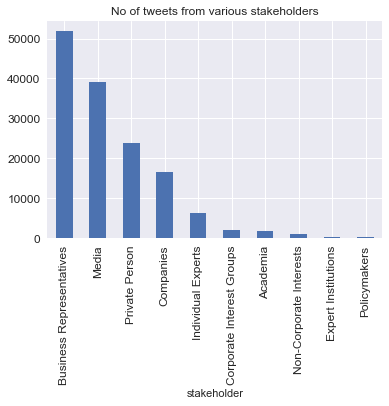

In [21]:
stakeholder_count['Number_of_tweets'].plot(kind='bar', title = "No of tweets from various stakeholders", fontsize = 12);


** It seems People in Academia aren't much interested in FinTech and policy maker don't even think about it. **

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


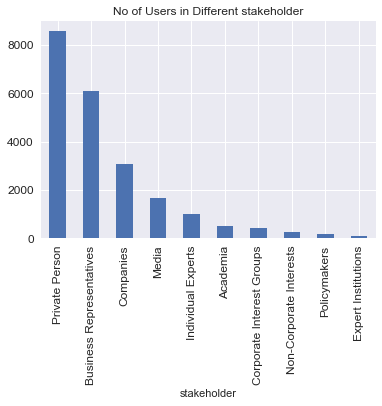

In [22]:
stakeholder_count.sort(['Number_of_users'], ascending=False)['Number_of_users'].plot(kind='bar', title = "No of Users in Different stakeholder", fontsize = 12);


** No of Twitter Users who are interested in FinTech are mostly Private Person or Business Representative;
Policymakers and Expert Instittution have the Least Number of Fintech Interested Users. **

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


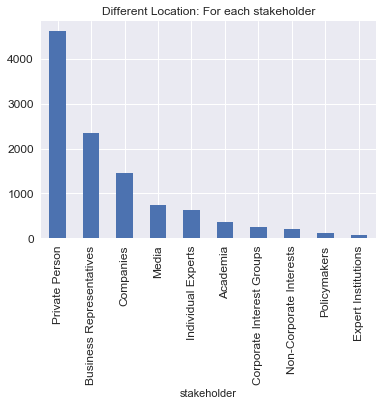

In [23]:
stakeholder_count.sort(['Num_diff_locations'], ascending=False)['Num_diff_locations'].plot(kind='bar', title = "Different Location: For each stakeholder", fontsize = 12);


** Fintech Interested Twitter Users come from various diffent location, but most diverse of that group is Private Person and Business Representatives and Least Diverse is Policymakers and Expert Institutions. **

## Let's Analyse our Twitter Data with Time Period Perspective

In [24]:
print('shape of the DataFrame:\n',df.shape)
df.head(2)

shape of the DataFrame:
 (349153, 10)


,topic,tweet,user,date,description,location,followers,stakeholder,year,month
0,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,2017-01-12 17:14:10,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous,2017,1
1,Fintech,RT @guzmand: No one innovation is a silver bul...,anas_sulaimi,2017-01-12 17:14:12,GUtech Graduate #IT Consultant: #cybersecurity...,"Muscat, Oman",\N,Ambiguous,2017,1


In [25]:
print("Concerting our Date column to panda Date format ... It's the Time the user Tweeted ...")
df.date = pd.to_datetime(df['date'])

Concerting our Date column to panda Date format ... It's the Time the user Tweeted ...


### Let's make our tweet time as the index of the data frame. It will be easier to visualise time based trends that way. 

In [26]:
df = df.set_index(['date'])
df.head(2)


,topic,tweet,user,description,location,followers,stakeholder,year,month
date,,,,,,,,,
2017-01-12 17:14:10,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous,2017,1
2017-01-12 17:14:12,Fintech,RT @guzmand: No one innovation is a silver bul...,anas_sulaimi,GUtech Graduate #IT Consultant: #cybersecurity...,"Muscat, Oman",\N,Ambiguous,2017,1


Let's collapse the DataFrame by time and generate plots of number of tweets over different timeperiod.
I will be using groupby command to make a new data frame

In [27]:
df.head()

,topic,tweet,user,description,location,followers,stakeholder,year,month
date,,,,,,,,,
2017-01-12 17:14:10,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous,2017,1
2017-01-12 17:14:12,Fintech,RT @guzmand: No one innovation is a silver bul...,anas_sulaimi,GUtech Graduate #IT Consultant: #cybersecurity...,"Muscat, Oman",\N,Ambiguous,2017,1
2017-01-12 17:14:12,Fintech,How Smart Contracts Are Changing Financial Ser...,bitcoinagile,"Streaming News: Bitcoin, Blockchain & Beyond #...",Matter Doesn't Matter,\N,Media,2017,1
2017-01-12 17:14:19,Fintech,Satoshium Project Announced &amp; White Paper ...,satoshiumorg,Minted Bitcoin,"Santa Monica, CA",\N,Ambiguous,2017,1
2017-01-12 17:14:26,Fintech,RT @sdubois: NYSE to allow all US listed secur...,BelieRxbelle,#Lovatic. #TeamBreezy. Musty mouthed Thot Bots...,Chicago,\N,Ambiguous,2017,1


In [28]:
def t(x):
     return pd.Series(dict(Number_of_tweets = x['tweet'].count()))

In [29]:
daily_count = df.groupby(df.index.date).apply(t)
print(len(daily_count))
daily_count.head(2)

58


,Number_of_tweets
2017-01-12,1663
2017-01-13,6807


In [30]:
daily_count.index.name = 'Date'
daily_count.head(2)

,Number_of_tweets
Date,
2017-01-12,1663
2017-01-13,6807


### Let's plot this to get insight about Fintech Tweet Activity

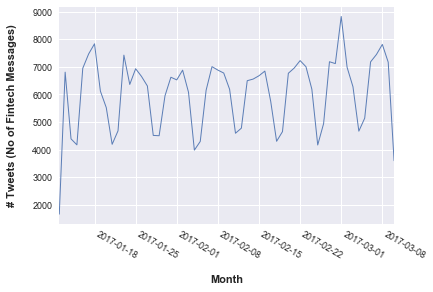

In [31]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.9, legend=True, x_compat=True);

daily_plot.set_xlabel('Month', weight='bold', labelpad=15);    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (No of Fintech Messages)', weight='bold', labelpad=15); #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

plt.xticks(fontsize = 9, rotation = -30, ha ="left");  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
plt.yticks(fontsize = 9);                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

daily_plot.legend_ = None;
daily_plot.tick_params(axis='x', pad=5); #SET PADDING ABOVE X-AXIS LABELS

#plt.savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png') 

** Isn't is surprising that people Were more interted in FinTech in February & March Month. May be Looking for new place
to Invest in March. **

In [32]:
## Let's calculate and predict NO of tweets Per day of the week
weekday_count = df.groupby(df.index.weekday).apply(t)
print(len(weekday_count))
weekday_count


7


,Number_of_tweets
0,54109
1,55539
2,58719
3,56092
4,52713
5,34814
6,37167


In [33]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days
weekday_count

,Number_of_tweets,day
0,54109,Monday
1,55539,Tuesday
2,58719,Wednesday
3,56092,Thursday
4,52713,Friday
5,34814,Saturday
6,37167,Sunday


In [34]:
#Can be done by this code too, but above one is better and easy to remeber
#print("let's get it by Weekday Name . . .")
#weekday_name_count = df.groupby(df.index.weekday_name).apply(t)
#print(len(weekday_name_count))
#weekday_name_count

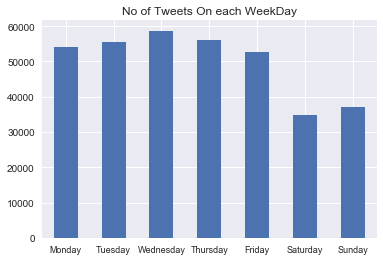

In [35]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar', title = "No of Tweets On each WeekDay");
plt.xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9);

** Another Great Insight: More Tweet about Fintech on Weekdays, weekends are for more lighter stuff...**

In [36]:
# Let's make another dataset for hour of the day count
print("calculating No of Tweets Each Hour the day... Little patience sir, I almost there!")
hourly_count = df.groupby(df.index.hour).apply(t)
print("Total No of Hours:\n",len(hourly_count))
hourly_count.index.name = "Hour"
hourly_count

calculating No of Tweets Each Hour the day... Little patience sir, I almost there!
Total No of Hours:
 24


,Number_of_tweets
Hour,
0,11188
1,9632
2,9722
3,9976
4,9317
5,9791
6,11466
7,12402
8,14870


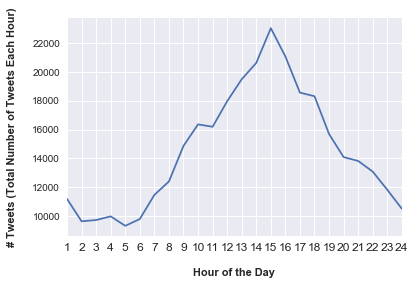

In [37]:
#plt.rcParams['figure.figsize'] = (10,8)

hourly_plot = hourly_count['Number_of_tweets'].plot(kind='line');
hours = list(range(1,25));                                                #GENERATE LIST FROM 1 TO 24
plt.xticks(np.arange(24), hours, rotation = 0,fontsize = 12);                  #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15);     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Total Number of Tweets Each Hour)', weight='bold', labelpad=15); #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

#savefig('hourly counts - line graph.png', bbox_inches='tight', dpi=300, format='png')

** So, Tweeples are Tweeting about FinTech more in the evening and most at 3:00pm, but they are tweeting all the time.
    Don't they sleep.**

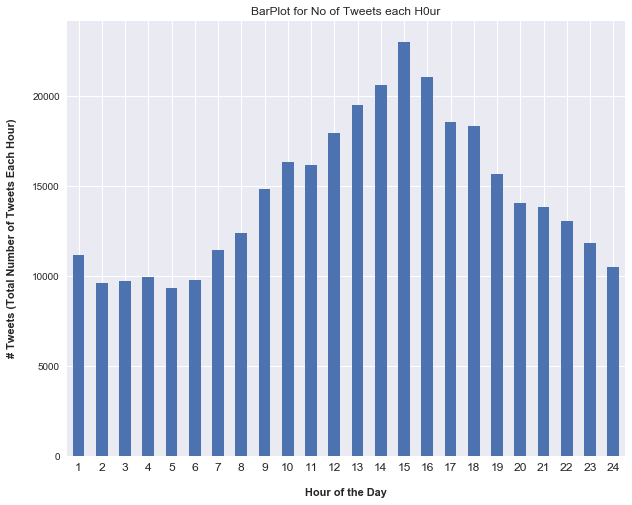

In [38]:
plt.rcParams['figure.figsize'] = (10,8)

hourly_plot = hourly_count['Number_of_tweets'].plot(kind='bar', title = "BarPlot for No of Tweets each H0ur");
hours = list(range(1,25));                                                #GENERATE LIST FROM 1 TO 24
plt.xticks(np.arange(24), hours, rotation = 0,fontsize = 12);                  #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15);     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Total Number of Tweets Each Hour)', weight='bold', labelpad=15); #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL


## Let's make a monthly Count Plots: What month Tweeples like FinTech Most

In [39]:
monthly_count = df.groupby(df.index.month).apply(t)

print("calculating No of Tweets Each Month... Little patience sir, I almost there!")
print("We have Data for %s Months only." %len(monthly_count))

monthly_count.index.name = "Month"

monthly_count

calculating No of Tweets Each Month... Little patience sir, I almost there!
We have Data for 3 Months only.


,Number_of_tweets
Month,
1,115071
2,168974
3,65108


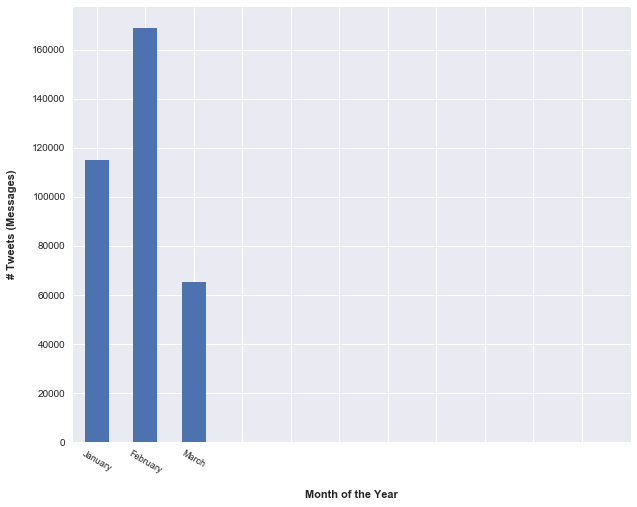

In [40]:
monthly_plot = monthly_count['Number_of_tweets'].plot(kind='bar');

months_name = ['January', 'February', 'March'];
plt.xticks(np.arange(12), months_name, rotation = -30,fontsize = 9);                  #USE THE CUSTOM TICKS

monthly_plot.set_xlabel('Month of the Year', weight='bold', labelpad=15);  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
monthly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15); #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL                                                     #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5);                                   #SET PADDING ABOVE X-AXIS LABELS

#daily_plot.legend_ = None;                                                 #TURN OFF LEGEND

#savefig('monthly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')


** More Fintech Tweets in February, If Fintech and Spring related Somehow! **

*** We can do the same for Minutes as well as Second (Really that would be a huge number) ***

# Let's Do someWork on Hashtags: What exactly Tweeples like about FinTech

In [41]:
df.head(2)


,topic,tweet,user,description,location,followers,stakeholder,year,month
date,,,,,,,,,
2017-01-12 17:14:10,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous,2017,1
2017-01-12 17:14:12,Fintech,RT @guzmand: No one innovation is a silver bul...,anas_sulaimi,GUtech Graduate #IT Consultant: #cybersecurity...,"Muscat, Oman",\N,Ambiguous,2017,1


In [42]:
# Let's reload the original provided DataFrame
print("Loading the Original Provided Pure DataFrame...Its Big!")
df = pd.read_pickle("FinTech_cleaned.pkl")
print("Showing you First two rows ... ")
df.head(2)

Loading the Original Provided Pure DataFrame...Its Big!
Showing you First two rows ... 


,topic,tweet,user,date,description,location,followers,stakeholder
0,Fintech,#bitcoin #fintech Fedcoin: The U.S. Will Issue...,Satoshinet_com,Thu Jan 12 17:14:10 +0000 2017,#bitcoin #fintech Get Free BitCoin - BitCoin F...,"Orlando, FL",\N,Ambiguous
1,Fintech,RT @guzmand: No one innovation is a silver bul...,anas_sulaimi,Thu Jan 12 17:14:12 +0000 2017,GUtech Graduate #IT Consultant: #cybersecurity...,"Muscat, Oman",\N,Ambiguous


In [43]:
print('Checking if provided tweets has retweets or just the original tweet: *&^%$: Some Hidden magic...')
df[df['tweet']=='THIS IS A RETWEET']
print("Seems it's empty: No retweets then")
print("We are good to work on this DataSet: It's Really Clean... My Goodness.")

Checking if provided tweets has retweets or just the original tweet: *&^%$: Some Hidden magic...


,topic,tweet,user,date,description,location,followers,stakeholder


Seems it's empty: No retweets then
We are good to work on this DataSet: It's Really Clean... My Goodness.


 ** Now we can do Two things : ** 
        - We can analyse the hashtags used in description column
        - We can alalyse hashtags used in tweet column 
    Let's do both but one at a time.

In [44]:
description_list = []                          #CREATE EMPTY LIST 
for i in df.description:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if pd.notnull(i):                      #IF CELL NOT EMPTY
        tags = i.split()                   #SPLIT EACH CELL INTO SEPARATE HASHTAGS
        for t in tags:                     #FOR EACH TAG IN THE CELL
            t = t.replace('#','')                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            description_list.append(t)         #ADD TAG TO OUR LIST
print(len(description_list))                    #PRINT NUMBER OF ITEMS IN OUR LIST
description_list[:5]   


5235517


['bitcoin', 'fintech', 'get', 'free', 'bitcoin']

** We have a lot of stopwords, non english words and website address, we need to drop them all. **

In [45]:
import nltk
words = set(nltk.corpus.words.words())
stopwords = set(nltk.corpus.stopwords.words())

description_list = [w for w in description_list if w in words and w not in stopwords]
description_list[:5] # list of final clean words

['get', 'free', 'faucet', 'faucet', 'list']

In [46]:
description_frame = pd.DataFrame(description_list, columns=['word'])
description_frame.head()

,word
0,get
1,free
2,faucet
3,faucet
4,list


In [47]:
def t(x):
    return pd.Series(dict(freq = x['word'].count()))

In [48]:
description_count = description_frame.groupby('word').apply(t)
description_count.head()

,freq
word,
aa,1
aam,1
aba,2
abaca,2
abalone,1


In [49]:
description_count  = description_count.sort('freq', ascending=False)
print("Most Used Words in Tweet Description")
description_count.head()
print("---------------------------")
print("Least Used Words in Tweet Description")
description_count.tail()
print("---------------------------")


Most Used Words in Tweet Description


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,freq
word,
news,34747
technology,24316
digital,24108
innovation,24053
director,22437


---------------------------
Least Used Words in Tweet Description


,freq
word,
horned,1
horizontal,1
skinned,1
hora,1
aa,1


---------------------------


** Peole are describing FinTech most likely as in NEWS, Digital,Innovation and Latest Technology and least likely as Horned or skinned. Therefore, we can say; Tweeple's (people on twitter) in this dataset has a positive feeling towards FinTech. **

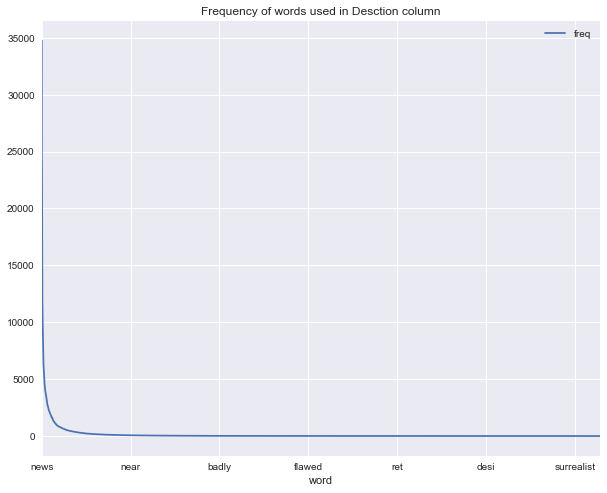

In [50]:
description_count.plot(title = 'Frequency of words used in Desction column');

WordCloud of Most Used words in Description


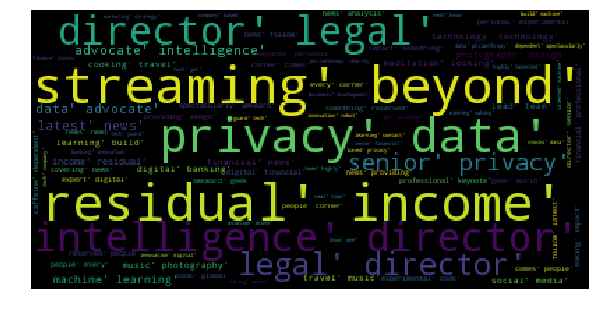

In [51]:
print("WordCloud of Most Used words in Description")
description_wordcloud = WordCloud().generate(str(description_list));
plt.imshow(description_wordcloud);
plt.axis("off");
plt.show();

## Let's do this all for tweets

In [52]:
tweet_list = []                          #CREATE EMPTY LIST 
for i in df.tweet:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if pd.notnull(i):                      #IF CELL NOT EMPTY
        tags = i.split()                   #SPLIT EACH CELL INTO SEPARATE HASHTAGS
        for t in tags:                     #FOR EACH TAG IN THE CELL
            t = t.replace('#','')                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            tweet_list.append(t)         #ADD TAG TO OUR LIST
print(len(tweet_list))                    #PRINT NUMBER OF ITEMS IN OUR LIST
tweet_list[:5] 

5315638


['bitcoin', 'fintech', 'fedcoin:', 'the', 'u.s.']

** We have a lot of stopwords, non english words and website address, we need to drop them all. **

In [53]:
import nltk
words = set(nltk.corpus.words.words())
stopwords = set(nltk.corpus.stopwords.words())

tweet_list = [w for w in tweet_list if w in words and w not in stopwords]
tweet_list[:5] # list of final clean words

['issue', 'use', 'one', 'innovation', 'silver']

In [54]:
tweet_frame = pd.DataFrame(tweet_list, columns=['word'])
tweet_frame.head()

,word
0,issue
1,use
2,one
3,innovation
4,silver


In [55]:
def t(x):
    return pd.Series(dict(freq = x['word'].count()))

In [56]:
tweet_count = tweet_frame.groupby('word').apply(t)
tweet_count.head()

,freq
word,
aa,1
aba,77
abacus,15
abandon,4
abandoned,5


In [57]:
tweet_count  = tweet_count.sort('freq', ascending=False);
print("Most Used Words in Tweets")
tweet_count.head()
print("---------------------------")
print("Least Used Words in Tweets")
tweet_count.tail()


Most Used Words in Tweets


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,freq
word,
banking,26458
via,21460
thanks,17192
latest,16825
tech,16767


---------------------------
Least Used Words in Tweets


,freq
word,
deflationary,1
renegade,1
deficit,1
deficiency,1
aa,1


---------------------------


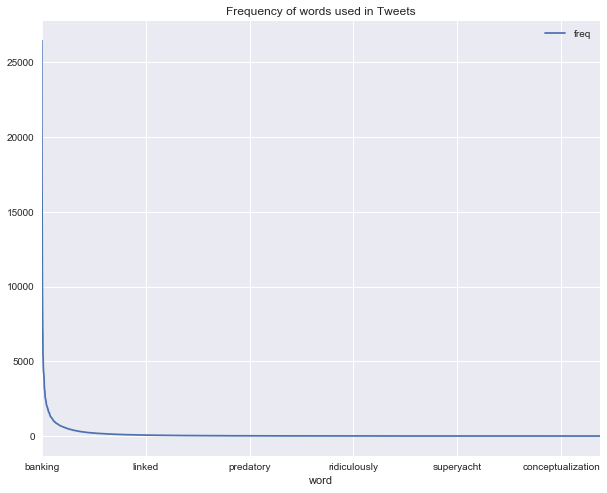

In [58]:
print("---------------------------")
tweet_count.plot(title = 'Frequency of words used in Tweets');

** Peole are describing FinTech most likely as Banking and Latest Tech and least likely as deflationary or renegade.
Therefore, we can say; Tweeple's (people on twitter) in this dataset has a positive feeling towards FinTech. **

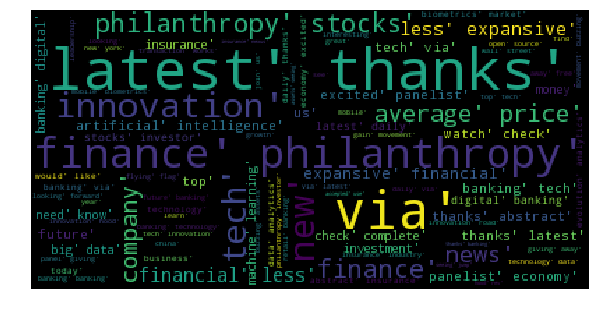

In [60]:
tweet_wordcloud = WordCloud().generate(str(tweet_list));
plt.imshow(tweet_wordcloud);
plt.axis("off");
plt.show();

## Additionaly we can create new features using countvectoriser function and make plots about what are most use words according to location as well as stakeholders

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


*** I tried but my computer(4GB RAM) is freezing while vectorising words in tweets or description.
I will try to tune the parameter to make it work in a low memory system. ***
....

** I will study about nltk library to check if that can help me overcome the memory issue. **